### Exploratory Data Analysis on Traffic Crashes – Vehicles in Chicago City
##### This dataset provides information on all the known Traffic Crashes in the Chicago City. It consists of 8,85,442 records that contains detailing crash characteristics, contributory causes, environmental conditions, and injuries. It provides valuable insights for analyzing patterns and causes of traffic incidents.
[Link : Traffic Crashes - Vehicles in Chicago City](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data)


#### Step 1: Importing Necessary libraries

In [218]:
# Importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Icon

#### Step 2: Load the dataset into Pandas Dataframe

In [220]:
# Load the dataset
file_path = "Traffic_Crashes_-_Crashes_20241022.csv"
df = pd.read_csv(file_path)

#### Step 3: Understand the Dataset

In [222]:
# Displays first few rows of the dataset
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [223]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885442 entries, 0 to 885441
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                885442 non-null  object 
 1   CRASH_DATE_EST_I               65522 non-null   object 
 2   CRASH_DATE                     885442 non-null  object 
 3   POSTED_SPEED_LIMIT             885442 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         885442 non-null  object 
 5   DEVICE_CONDITION               885442 non-null  object 
 6   WEATHER_CONDITION              885442 non-null  object 
 7   LIGHTING_CONDITION             885442 non-null  object 
 8   FIRST_CRASH_TYPE               885442 non-null  object 
 9   TRAFFICWAY_TYPE                885442 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      885442 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [224]:
# To display summary statistics for numeric columns
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,885442.000000,1.990170e+05,885442.000000,885437.000000,885442.000000,883488.000000,883488.000000,883488.000000,883488.000000,883488.000000,883488.000000,883488.0,885442.000000,885442.000000,885442.000000,879109.000000,879109.000000
mean,28.419400,1.332970e+01,3687.700059,1244.915095,2.035205,0.193845,0.001191,0.019794,0.108747,0.064113,2.001200,0.0,13.203157,4.120744,6.661769,41.855149,-87.673727
std,6.117384,2.961542e+03,2880.432718,704.922159,0.452244,0.571851,0.037445,0.164770,0.425268,0.325510,1.156983,0.0,5.573022,1.981550,3.363342,0.333241,0.676892
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1251.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783109,-87.721824
50%,30.000000,2.000000e+00,3201.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874952,-87.674243
75%,30.000000,4.000000e+00,5562.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924534,-87.633540
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [225]:
# To display the names of all columns
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [226]:
# To check any missing values are present in the columns
missing_values = df.isnull().sum()
print(missing_values)

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 819920
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         686425
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       27279
CRASH_TYPE                            0
INTERSECTION_RELATED_I           682266
NOT_RIGHT_OF_WAY_I               845027
HIT_AND_RUN_I                    607752
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [227]:
# Used to drop duplicate rows, if any
df = df.drop_duplicates()
print(df)

                                          CRASH_RECORD_ID CRASH_DATE_EST_I  \
0       6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1       5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2       61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3       004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4       a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   
...                                                   ...              ...   
885437  3a5f25711e9162f0042a53337a25f2c3dc72893c1172d9...              NaN   
885438  fb93c3183712074555fc2062c807c10dc6e25be439705b...              NaN   
885439  61c8dcd63fae60613bc9ec526fa901420cbe99a6d35840...              NaN   
885440  f2c0204e5392ff379e5804ad25fad66304949d517327c6...              NaN   
885441  e88a7d78baea3f2de14f0042ce24937d03ca58553c7102...              NaN   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONT

In [228]:
# To handle missing values (could drop or impute, depending on context)
# df = df.dropna() 

In [229]:
# Checking the cleaned data after dropping the duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885442 entries, 0 to 885441
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                885442 non-null  object 
 1   CRASH_DATE_EST_I               65522 non-null   object 
 2   CRASH_DATE                     885442 non-null  object 
 3   POSTED_SPEED_LIMIT             885442 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         885442 non-null  object 
 5   DEVICE_CONDITION               885442 non-null  object 
 6   WEATHER_CONDITION              885442 non-null  object 
 7   LIGHTING_CONDITION             885442 non-null  object 
 8   FIRST_CRASH_TYPE               885442 non-null  object 
 9   TRAFFICWAY_TYPE                885442 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      885442 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [230]:
# To check any missing values are present in the columns
missing_values = df.isnull().sum()
print(missing_values)

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 819920
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         686425
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       27279
CRASH_TYPE                            0
INTERSECTION_RELATED_I           682266
NOT_RIGHT_OF_WAY_I               845027
HIT_AND_RUN_I                    607752
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [231]:
# Displays first few rows of the dataset
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


#### Step 4: Data Cleaning

In [233]:
# Identifying columns with more than 50% missing data
threshold = 0.5 * len(df)
columns_to_drop = df.columns[df.isnull().sum() > threshold]

# Drop those columns
df_cleaned = df.drop(columns=columns_to_drop)

# Drop other irrelevant columns (e.g., IDs, location info)
irrelevant_columns = ['CRASH_RECORD_ID', 'LOCATION']
df_cleaned = df_cleaned.drop(columns=irrelevant_columns, errors='ignore')

# Display the cleaned dataset info
df_cleaned_info = df_cleaned.info()

# Display the first few rows of the cleaned dataset
df_cleaned_head = df_cleaned.head()

df_cleaned_info, df_cleaned_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885442 entries, 0 to 885441
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_DATE                     885442 non-null  object 
 1   POSTED_SPEED_LIMIT             885442 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE         885442 non-null  object 
 3   DEVICE_CONDITION               885442 non-null  object 
 4   WEATHER_CONDITION              885442 non-null  object 
 5   LIGHTING_CONDITION             885442 non-null  object 
 6   FIRST_CRASH_TYPE               885442 non-null  object 
 7   TRAFFICWAY_TYPE                885442 non-null  object 
 8   ALIGNMENT                      885442 non-null  object 
 9   ROADWAY_SURFACE_COND           885442 non-null  object 
 10  ROAD_DEFECT                    885442 non-null  object 
 11  REPORT_TYPE                    858163 non-null  object 
 12  CRASH_TYPE                    

(None,
                CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
 0  08/18/2023 12:50:00 PM                  15                  OTHER   
 1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
 2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
 3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
 4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   
 
        DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
 0  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
 1  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
 2           NO CONTROLS             CLEAR           DAYLIGHT   
 3           NO CONTROLS             CLEAR           DAYLIGHT   
 4           NO CONTROLS             CLEAR           DAYLIGHT   
 
        FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE           ALIGNMENT  \
 0              REAR END                            OTHER  STRAIGHT AND LEVEL   

#### Step 5: Visual Insights
##### After completing the data understanding and data cleaning process, I am proceeding with the visualization. Below, I have outlined a set of exploratory data analysis questions, and I will work on finding the outcomes for these questions.
##### 1.What is the distribution of posted speed limits in the dataset, and how does it vary across different recorded traffic incidents?
##### 2.What are the most common traffic control devices present at the locations of traffic crashes, and how frequently do they occur?
##### 3.What is the relationship between numerical features in the dataset, and how strongly are they correlated with each other?
##### 4.What weather conditions are most frequently associated with traffic crashes, and are there specific conditions that appear more prone to incidents?
##### 5.On which days of the week do traffic crashes most commonly occur, and is there a noticeable trend in crash frequency across weekdays and weekends?
##### 6.How is the distribution of traffic crashes spread throughout the hours of the day, and are there specific times when crashes are more frequent? - Eve 4
##### 7."How do different types of crashes vary with posted speed limits, and which crash types are most common across different speed limits?"
##### 8.Which specific streets and locations (latitude and longitude) experience the highest number of traffic crashes, and how concentrated are these incidents in certain areas?
##### 9.Where are the most traffic crashes concentrated geographically, and what patterns can be observed in the distribution of these high-crash areas?
##### 10.What are the most common primary contributory causes for traffic crashes, and how do these causes vary in frequency?

##### Univariate Analysis

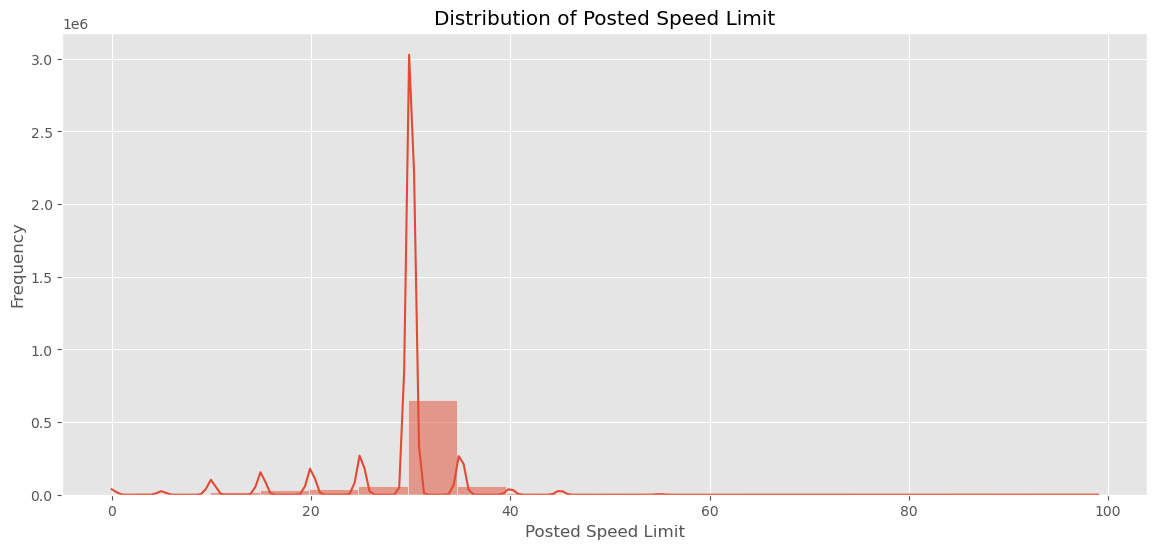

In [236]:
# 1.What is the distribution of posted speed limits in the dataset, and how does it vary across different recorded traffic incidents?
plt.figure(figsize=(14, 6))
sns.histplot(df_cleaned['POSTED_SPEED_LIMIT'], kde=True, bins=20)
plt.title('Distribution of Posted Speed Limit')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Frequency')
plt.show()

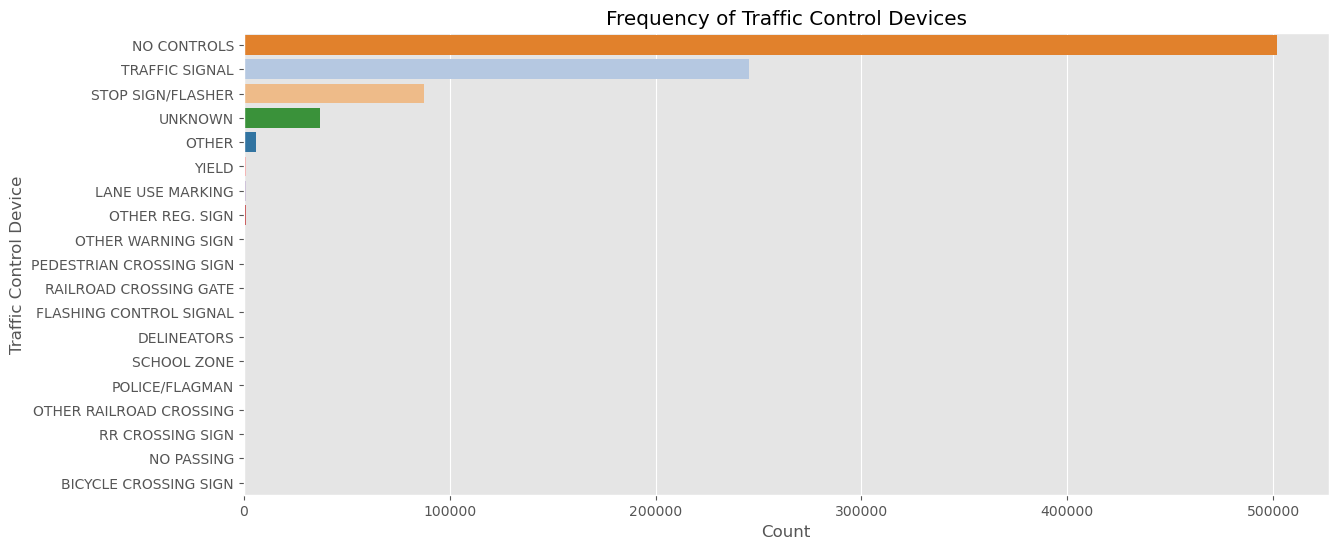

In [237]:
# 2.What are the most common traffic control devices present at the locations of traffic crashes, and how frequently do they occur?
# Set the plot size and style
plt.figure(figsize=(14, 6))
plt.style.use('ggplot')

# Plot the distribution of 'TRAFFIC_CONTROL_DEVICE' with hue and different colors
sns.countplot(
    data=df_cleaned,
    y='TRAFFIC_CONTROL_DEVICE',
    order=df_cleaned['TRAFFIC_CONTROL_DEVICE'].value_counts().index,
    hue='TRAFFIC_CONTROL_DEVICE',
    palette='tab20',
    dodge=False,
    legend=False  # Disable the legend since hue and y are the same
)
plt.title('Frequency of Traffic Control Devices')
plt.xlabel('Count')
plt.ylabel('Traffic Control Device')
plt.show()

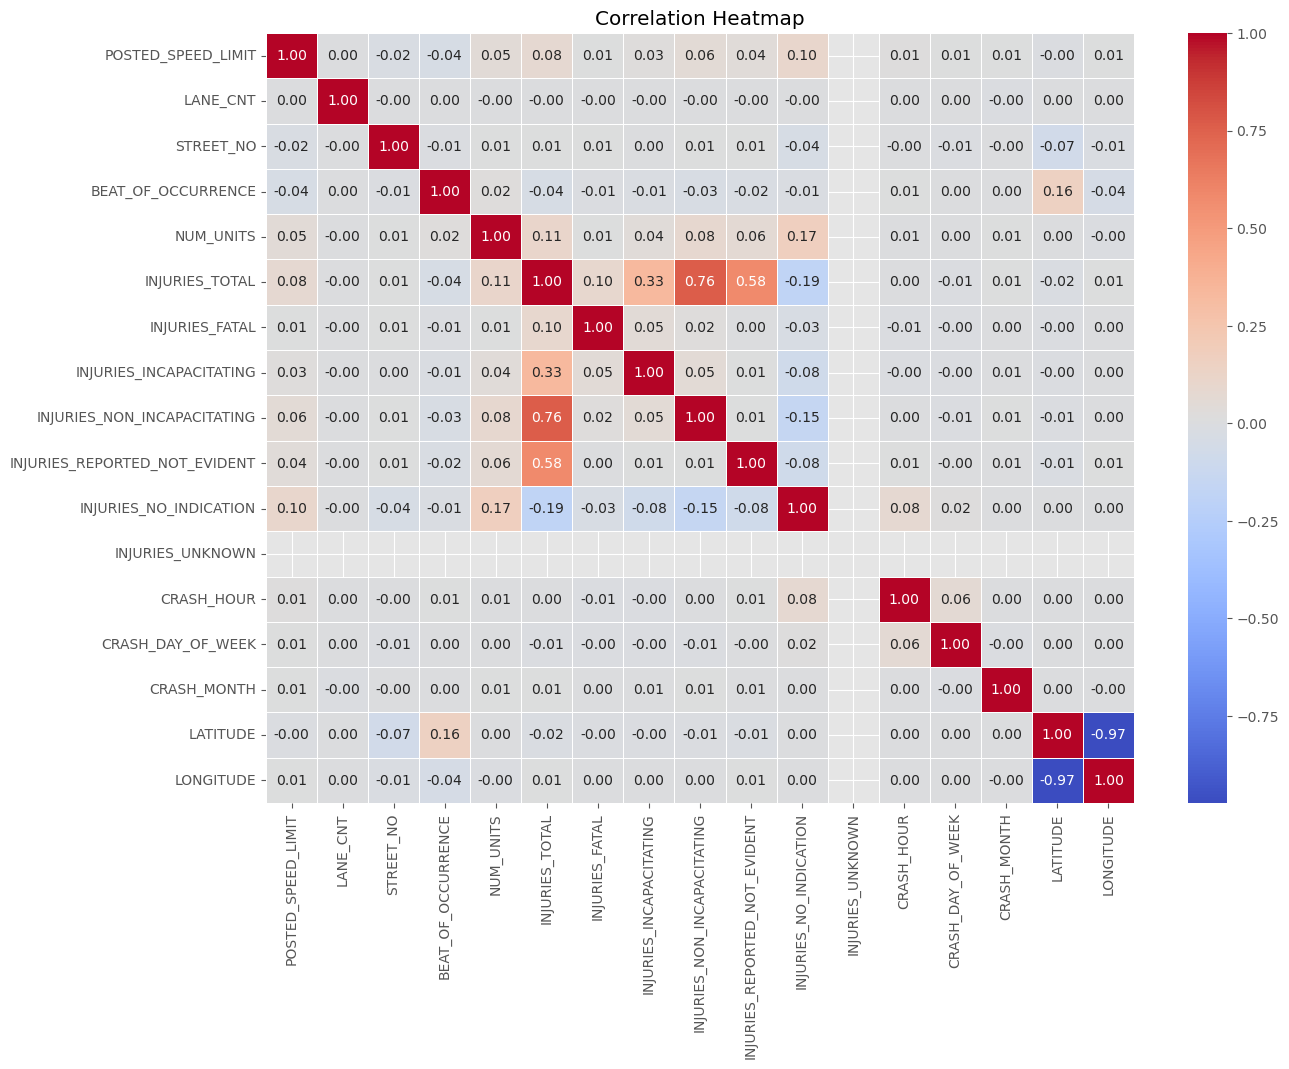

(       POSTED_SPEED_LIMIT      STREET_NO  BEAT_OF_OCCURRENCE      NUM_UNITS  \
 count       885442.000000  885442.000000       885437.000000  885442.000000   
 mean            28.419400    3687.700059         1244.915095       2.035205   
 std              6.117384    2880.432718          704.922159       0.452244   
 min              0.000000       0.000000          111.000000       1.000000   
 25%             30.000000    1251.000000          715.000000       2.000000   
 50%             30.000000    3201.000000         1212.000000       2.000000   
 75%             30.000000    5562.000000         1822.000000       2.000000   
 max             99.000000  451100.000000         6100.000000      18.000000   
 
        INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
 count   883488.000000   883488.000000            883488.000000   
 mean         0.193845        0.001191                 0.019794   
 std          0.571851        0.037445                 0.164770   
 min      

In [238]:
# 3.What is the relationship between numerical features in the dataset, and how strongly are they correlated with each other?
missing_values = df_cleaned.isnull().mean() * 100
numeric_df = df.select_dtypes(include='number')

# Generate the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Display the summary statistics and missing values report
summary_stats, missing_values[missing_values > 0]

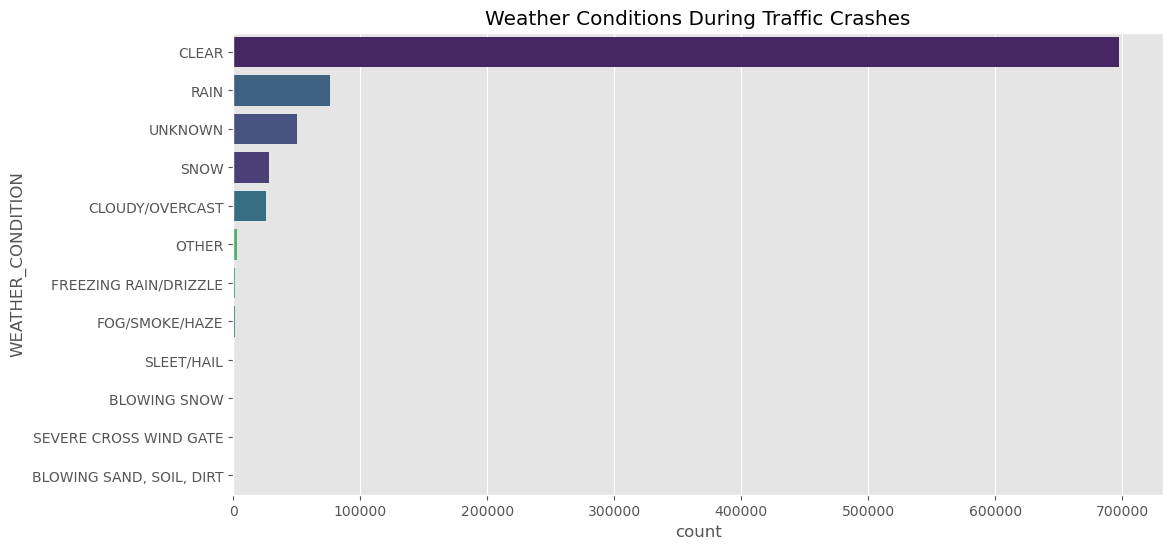

In [239]:
# 4.What weather conditions are most frequently associated with traffic crashes, and are there specific conditions that appear more prone to incidents?
plt.figure(figsize=(12, 6))
sns.countplot(y='WEATHER_CONDITION', data=df, order=df['WEATHER_CONDITION'].value_counts().index, hue='WEATHER_CONDITION', palette='viridis', dodge=False, legend=False)
plt.title('Weather Conditions During Traffic Crashes')
plt.show()

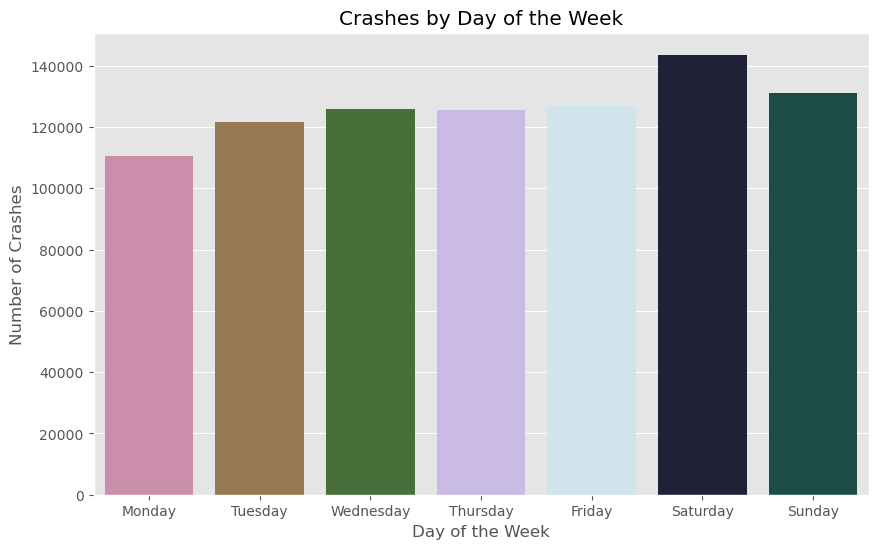

In [240]:
# 5.On which days of the week do traffic crashes most commonly occur, and is there a noticeable trend in crash frequency across weekdays and weekends?
# Create a mapping dictionary for days of the week
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Map the numerical days to their corresponding names
df['CRASH_DAY_NAME'] = df['CRASH_DAY_OF_WEEK'].map(day_mapping)

# Plot the distribution of crashes by day of the week with names and updated palette assignment
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH_DAY_NAME', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='CRASH_DAY_NAME', palette='cubehelix', dodge=False, legend=False)
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()

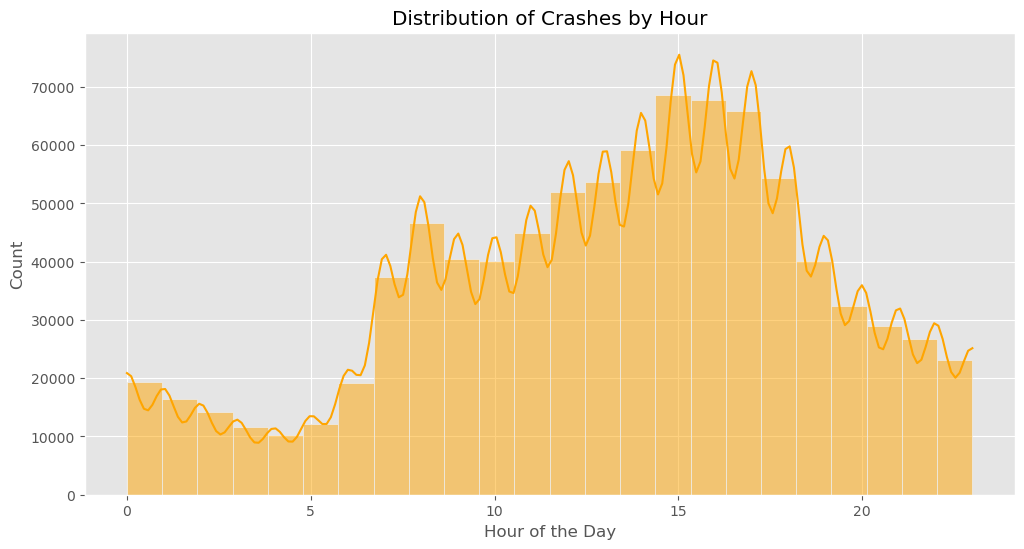

In [241]:
# 6.How is the distribution of traffic crashes spread throughout the hours of the day, and are there specific times when crashes are more frequent? - Eve 4
plt.figure(figsize=(12, 6))
sns.histplot(df['CRASH_HOUR'].dropna(), bins=24, kde=True, color='orange')
plt.title('Distribution of Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.show()

##### Bivariate Analysis

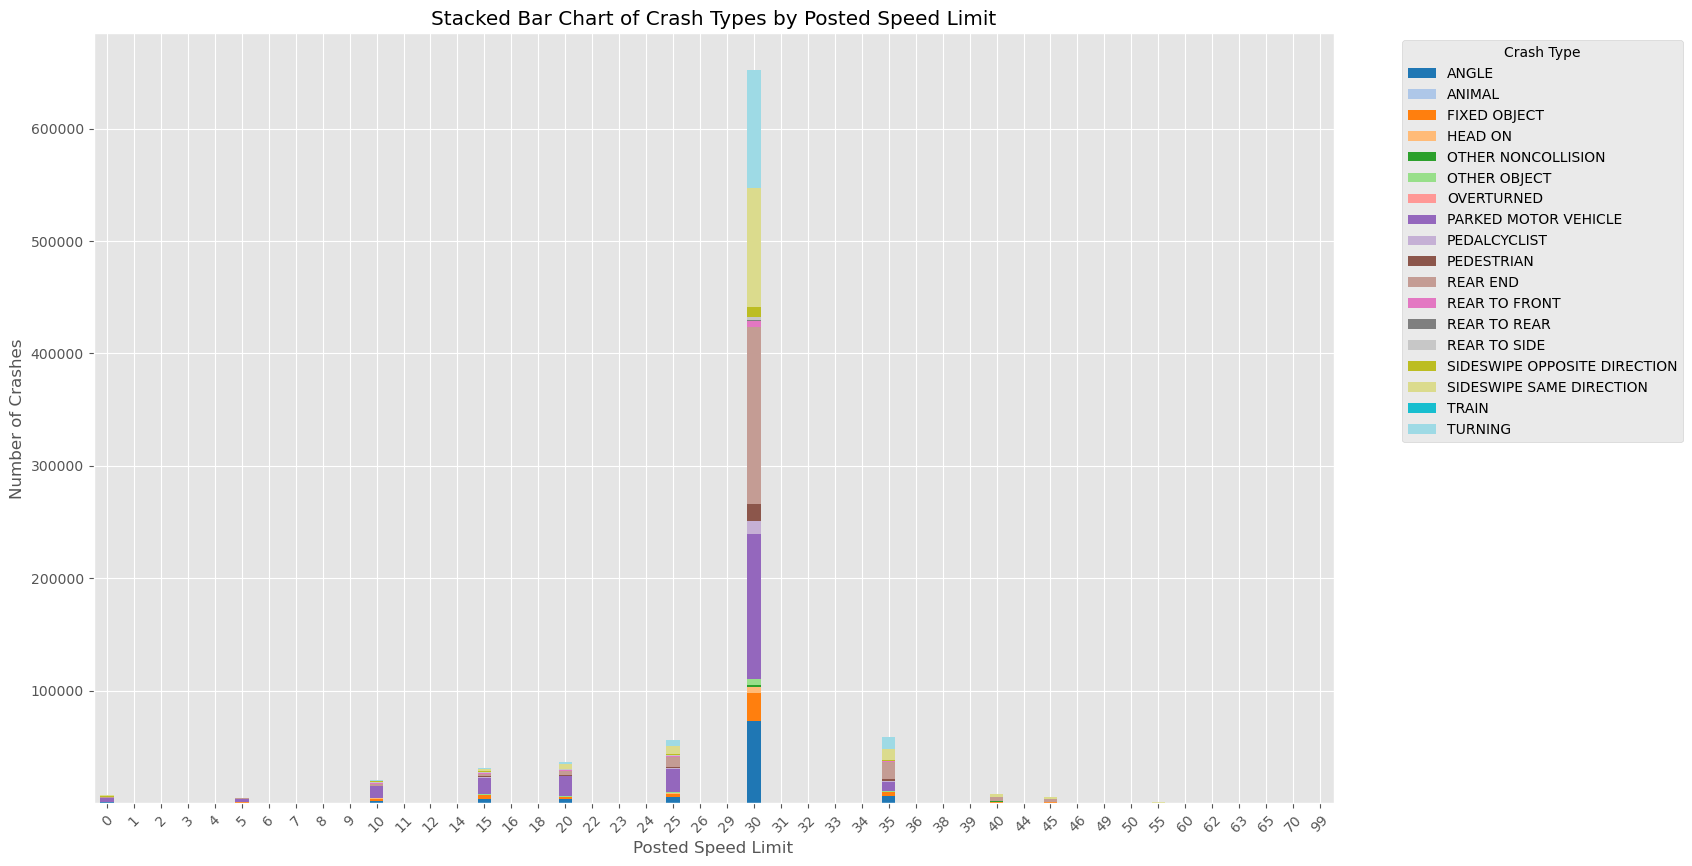

The most common crash type is 'PARKED MOTOR VEHICLE' with a total of 205198 crashes.


In [243]:
# 7."How do different types of crashes vary with posted speed limits, and which crash types are most common across different speed limits?"
# Pivot the data for easier plotting
pivot_df = pd.crosstab(df['POSTED_SPEED_LIMIT'], df['FIRST_CRASH_TYPE'])

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab20')
plt.title('Stacked Bar Chart of Crash Types by Posted Speed Limit')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend(title='Crash Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Find the total number of crashes for each crash type across all posted speed limits
crash_type_totals = pivot_df.sum(axis=0).sort_values(ascending=False)

# Display the most common crash type and its count
most_common_crash_type = crash_type_totals.index[0]
most_common_crash_count = crash_type_totals.iloc[0]

print(f"The most common crash type is '{most_common_crash_type}' with a total of {most_common_crash_count} crashes.")



In [244]:
# 8.Which specific streets and locations (latitude and longitude) experience the highest number of traffic crashes, and how concentrated are these incidents in certain areas?
# Group by LATITUDE, LONGITUDE, and STREET_NAME to find the top crash areas
location_crash_counts_with_street = df.groupby(['LATITUDE', 'LONGITUDE', 'STREET_NAME']).size().reset_index(name='CRASH_COUNT')

# Sort by the number of crashes in descending order and get the top 10 areas
top_crash_areas_with_street = location_crash_counts_with_street.sort_values(by='CRASH_COUNT', ascending=False).head(10)

# Display the top 10 areas with the highest number of crashes including street names
print("Top 10 Areas with the Most Crashes including Street Names:")
print(top_crash_areas_with_street)


Top 10 Areas with the Most Crashes including Street Names:
         LATITUDE  LONGITUDE       STREET_NAME  CRASH_COUNT
290496  41.976201 -87.905309          OHARE ST         1404
89067   41.791420 -87.580148     LAKE SHORE DR          620
46189   41.751461 -87.585972  STONY ISLAND AVE          598
23876   41.722257 -87.585276  STONY ISLAND AVE          480
198030  41.900959 -87.619928  LAKE SHORE DR SB          452
49225   41.754660 -87.741385        CICERO AVE          404
198029  41.900959 -87.619928  LAKE SHORE DR NB          351
87265   41.789329 -87.741646        CICERO AVE          347
197779  41.900753 -87.624235     LAKE SHORE DR          330
31679   41.736209 -87.624306          STATE ST          316


In [245]:
# 9.Where are the most traffic crashes concentrated geographically, and what patterns can be observed in the distribution of these high-crash areas?
# Creating a base map centered around an average location
m = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=11)

# Add markers for the top 10 areas with the most crashes
for _, row in top_crash_areas.iterrows():
    if pd.notnull(row['LATITUDE']) and pd.notnull(row['LONGITUDE']):
        folium.CircleMarker(
            location=(row['LATITUDE'], row['LONGITUDE']),
            radius=row['CRASH_COUNT'] / 50,  # Scale size of the marker by crash count
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=f"Crashes: {row['CRASH_COUNT']}"
        ).add_to(m)

# Display the map
m


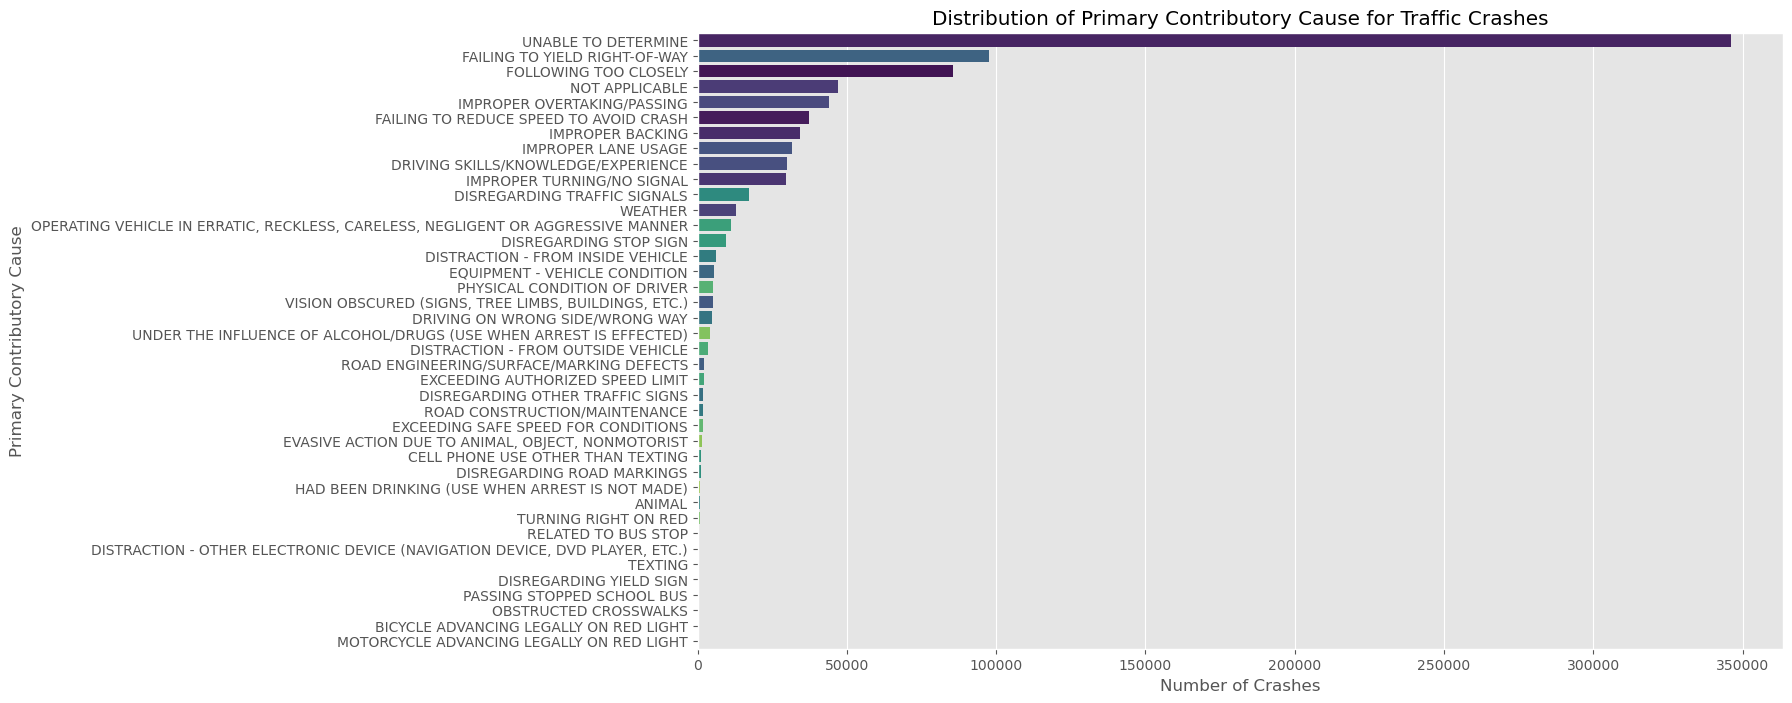

In [246]:
# 10.What are the most common primary contributory causes for traffic crashes, and how do these causes vary in frequency?
# Set the plot size and style for better visualization
plt.figure(figsize=(14, 8))
plt.style.use('ggplot')

# Plot the distribution of 'PRIM_CONTRIBUTORY_CAUSE' with updated hue assignment
sns.countplot(
    y='PRIM_CONTRIBUTORY_CAUSE',
    data=df,
    order=df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index,
    hue='PRIM_CONTRIBUTORY_CAUSE',
    palette='viridis',
    legend=False  # Hide the legend as it's not necessary for this plot
)
plt.title('Distribution of Primary Contributory Cause for Traffic Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Primary Contributory Cause')
plt.show()


#### Summary & Findings
##### 1.The highest number of accidents occur at a posted speed limit of 35 km/h.
##### 2.Most accidents take place in areas without any traffic control devices.
##### 3.Approximately 700,000 crashes happen under clear weather conditions.
##### 4.Saturday records the highest number of crashes, with more than 140,000 incidents.
##### 5.The peak time for major accidents is between 3 PM and 4 PM.
##### 6.The crash type "Parked Motor Vehicle" is the most frequent, with a total of 205,198 recorded crashes.
##### 7.O'Hare Street, located near O'Hare International Airport, has the highest crash count, with 1,404 incidents.
##### 8.The primary contributory cause for most crashes is often reported as undetermined.